# Code from N2change_dataprocessing_block

In [37]:
%matplotlib inline
import numpy as np
import xarray as xr
import scipy.io as sio
import os
import matplotlib.pyplot as plt

import utils as utils
import topo as topo

In [2]:
class load_data:
    """
    read data EasyOcean from GOSHIP-EasyOcean gridded data
    """
    def data_EasyOcean_grid(data0):
        """read gridded data from .mat and output xarray.Dataset"""
        NTime = np.zeros((len(data0['ll_grid']), len(data0['D_pr'])), dtype='datetime64[ns]')
        CTDCT = np.zeros((len(data0['pr_grid']), len(data0['ll_grid']), len(data0['D_pr']))) + np.nan
        CTDSA = np.zeros(CTDCT.shape) + np.nan
        CTDsig4 = np.zeros(CTDCT.shape) + np.nan
        CTDN2 = np.zeros(CTDCT.shape) + np.nan
        CTDN2_f1 = np.zeros(CTDCT.shape) + np.nan
        CTDN2_f2 = np.zeros(CTDCT.shape) + np.nan
        CTDN2_f3 = np.zeros((len(data0['pr_grid_lr']), len(data0['ll_grid']), len(data0['D_pr']))) + np.nan
        CTDN2_f4 = np.zeros(CTDN2_f3.shape) + np.nan
    #     CTDtem = np.zeros(CTDCT.shape) + np.nan
    #     CTDsal = np.zeros(CTDCT.shape) + np.nan
    #     CTDoxy = np.zeros(CTDCT.shape) + np.nan

        for i in range(len(data0['D_pr'])):
            NTime[:, i] = utils.datenum_to_datetime64(data0['D_pr'][i].NTime,0)
            CTDCT[:, :, i] = data0['D_pr'][i].CTDCT
            CTDSA[:, :, i] = data0['D_pr'][i].CTDSA
            CTDsig4[:, :, i] = data0['D_pr'][i].CTDsig4
            CTDN2[:, :, i] = data0['D_pr'][i].CTDN2
            CTDN2_f1[:, :, i] = data0['D_pr'][i].CTDN2_f1
            CTDN2_f2[:, :, i] = data0['D_pr'][i].CTDN2_f2
            CTDN2_f3[:, :, i] = data0['D_pr'][i].CTDN2_f3
            CTDN2_f4[:, :, i] = data0['D_pr'][i].CTDN2_f4
    #         CTDtem[:,:,i] = data0['D_pr'][i].CTDtem
    #         CTDsal[:,:,i] = data0['D_pr'][i].CTDsal
    #         CTDoxy[:,:,i] = data0['D_pr'][i].CTDoxy

        # build dataset
        section_time = xr.DataArray(NTime, dims=['latitude_longitude', 'gridded_section'],
                                    coords={'latitude_longitude': data0['ll_grid'],
                                            'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                                    attrs={'long_name': 'section_time'})
        absolute_salinity = xr.DataArray(CTDSA, dims=['pressure', 'latitude_longitude', 'gridded_section'],
                                         coords={'latitude_longitude': data0['ll_grid'],
                                                 'pressure': data0['pr_grid'],
                                                 'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                                         attrs={'long_name': 'absolute_salinity'})
        conservative_temperature = xr.DataArray(CTDCT, dims=['pressure', 'latitude_longitude', 'gridded_section'],
                                                coords={'latitude_longitude': data0['ll_grid'],
                                                        'pressure': data0['pr_grid'],
                                                        'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                                                attrs={'long_name': 'conservative_temperature'})
        sig4 = xr.DataArray(CTDsig4, dims=['pressure', 'latitude_longitude', 'gridded_section'],
                            coords={'latitude_longitude': data0['ll_grid'],
                                    'pressure': data0['pr_grid'],
                                    'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                            attrs={'long_name': 'sig4'})
        nsquares = xr.DataArray(CTDN2, dims=['pressure', 'latitude_longitude', 'gridded_section'],
                                coords={'latitude_longitude': data0['ll_grid'],
                                        'pressure': data0['pr_grid'],
                                        'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                                attrs={'long_name': 'nsquares'})
        nsquares_filter1 = xr.DataArray(CTDN2_f1, dims=['pressure', 'latitude_longitude', 'gridded_section'],
                                        coords={'latitude_longitude': data0['ll_grid'],
                                                'pressure': data0['pr_grid'],
                                                'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                                        attrs={'long_name': 'nsquares from filtered CT & SA'})
        nsquares_filter2 = xr.DataArray(CTDN2_f2, dims=['pressure', 'latitude_longitude', 'gridded_section'],
                                        coords={'latitude_longitude': data0['ll_grid'],
                                                'pressure': data0['pr_grid'],
                                                'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                                        attrs={'long_name': 'nsquares from filtered sig4'})
        nsquares_filter3 = xr.DataArray(CTDN2_f3, dims=['pressure_lr', 'latitude_longitude', 'gridded_section'],
                                        coords={'latitude_longitude': data0['ll_grid'],
                                                'pressure_lr': data0['pr_grid_lr'],
                                                'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                                        attrs={'long_name': 'nsquares from linear least-square fit in sig4 layers'})
        nsquares_filter4 = xr.DataArray(CTDN2_f4, dims=['pressure_lr', 'latitude_longitude', 'gridded_section'],
                                        coords={'latitude_longitude': data0['ll_grid'],
                                                'pressure_lr': data0['pr_grid_lr'],
                                                'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                                        attrs={'long_name': 'nsquares from linear least-square fit in local pd layers'})

        Data = xr.Dataset({'section_time': (['latitude_longitude', 'gridded_section'], section_time),
                           'absolute_salinity': (['pressure', 'latitude_longitude', 'gridded_section'], absolute_salinity),
                           'conservative_temperature': (['pressure', 'latitude_longitude', 'gridded_section'], conservative_temperature),
                           'sig4': (['pressure', 'latitude_longitude', 'gridded_section'], sig4),
                           'nsquares': (['pressure', 'latitude_longitude', 'gridded_section'], nsquares),
                           'nsquares_filter1': (['pressure', 'latitude_longitude', 'gridded_section'], nsquares_filter1),
                           'nsquares_filter2': (['pressure', 'latitude_longitude', 'gridded_section'], nsquares_filter2),
                           'nsquares_filter3': (['pressure_lr', 'latitude_longitude', 'gridded_section'], nsquares_filter3),
                           'nsquares_filter4': (['pressure_lr', 'latitude_longitude', 'gridded_section'], nsquares_filter4)},
                          coords={'latitude_longitude': data0['ll_grid'],
                                  'pressure': data0['pr_grid'],
                                  'pressure_lr': data0['pr_grid_lr'],
                                  'gridded_section': np.arange(1, len(data0['D_pr'])+1, 1, int)},
                          attrs={'title': 'Gridded data',
                                 'description': '1. compute N2 and N2_filter from reported data 2. vertical linear interpolation 3. lateral linear interpolation '})

        return Data

In [3]:
def convert_data(
    data, 
):
    """
    output Data from data, picking out N2 computed using desired method
    

    Parameters
    ------
    data : XarrayDataset
           in-situ section

    Returns
    -------
    Data : processed data, XarrayDataset, N2 from sig4 regression
    """  
    z_span = np.diff(data.pressure_lr.data)[0]/2
    z_center = data.pressure_lr.data 
    
    
    SA = np.zeros((len(data.gridded_section.data), len(data.latitude_longitude.data), len(data.pressure.data))) + np.nan
    CT = np.zeros((len(data.gridded_section.data), len(data.latitude_longitude.data), len(data.pressure.data))) + np.nan
    Sig4 = np.zeros((len(data.gridded_section.data), len(data.latitude_longitude.data), len(data.pressure.data))) + np.nan
    N2 = np.zeros((len(data.gridded_section.data), len(data.latitude_longitude.data), len(data.pressure_lr.data))) + np.nan
    Sig4_N2 = np.zeros((len(data.gridded_section.data), len(data.latitude_longitude.data), len(data.pressure_lr.data))) + np.nan
    CT_N2 = np.zeros((len(data.gridded_section.data), len(data.latitude_longitude.data), len(data.pressure_lr.data))) + np.nan
    SA_N2 = np.zeros((len(data.gridded_section.data), len(data.latitude_longitude.data), len(data.pressure_lr.data))) + np.nan
    
    for i in range(len(data.gridded_section.data)):
        for j in range(len(data.latitude_longitude.data)):
            SA[i, j, :] = data.absolute_salinity.data[:, j, i].copy()
            CT[i, j, :] = data.conservative_temperature.data[:, j, i].copy()
            Sig4[i, j, :] = data.sig4.data[:, j, i].copy()
            
            N2[i, j, :] = data.nsquares_filter4.data[:, j, i].copy()
            sig4_blocks, z_blocks, var_blocks_idx = utils.get_blocks(
                Sig4[i, j, :], data.pressure.data, z_span, z_center)       
            ct_blocks = utils.get_blocks(CT[i, j, :], data.pressure.data, z_span, z_center)[0]
            sa_blocks = utils.get_blocks(SA[i, j, :], data.pressure.data, z_span, z_center)[0]
            for k in range(len(z_center)):
                Sig4_N2[i, j, k] = np.nanmean(sig4_blocks[k])
                CT_N2[i, j, k] = np.nanmean(ct_blocks[k])
                SA_N2[i, j, k] = np.nanmean(sa_blocks[k])
      

    Data = xr.Dataset({'SA': (['N_Occup', 'LL', 'Pressure'], SA),
                       'CT': (['N_Occup', 'LL', 'Pressure'],  CT),
                       'Sig4': (['N_Occup', 'LL', 'Pressure'], Sig4),
                       'N2': (['N_Occup', 'LL', 'z_N2'],  N2),
                       'Sig4_N2': (['N_Occup', 'LL', 'z_N2'],  Sig4_N2),
                       'CT_N2': (['N_Occup', 'LL', 'z_N2'],  CT_N2),
                       'SA_N2': (['N_Occup', 'LL', 'z_N2'],  SA_N2),
                       'time': (['N_Occup', 'LL'],  data.section_time.data.T)},
                      coords={'Pressure': data.pressure.data,
                              'N_Occup': data.gridded_section.data,
                              'LL': data.latitude_longitude.data,
                              'z_N2': data.pressure_lr.data},
                      attrs={'title': 'converted EasyOcean gridded data, z_N2 is pressure'})
    
    return Data


In [4]:
class significant_test:
    def effective_degree_of_freedom(dis, L_decorr = 163e+3):
        """horizontal distance/ decorrelation length scale from Purkey and Johnson 2010"""
        return dis/L_decorr

    

    def effective_degree_of_freedom_v(dis_v, L_decorr_v = 80):
        """vertical distance/ decorrelation length scale from the mode of integrated N2 trend autocorrelation"""
        return dis_v/L_decorr_v

    
    
    def confidence_interval_student_t(sample_mean, sample_std, degrees_freedom, confidence_level=0.95):
        """confidence level by default is two-sided in scipy"""

        import scipy
        sample_standard_error = sample_std/np.sqrt(degrees_freedom)
        CI = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
        standard_error = sample_standard_error.copy()
            
        return CI, standard_error


In [5]:
class trend_in_blocks:
    """compute N2 trend, and confidence interval in spacial blocks"""
    
    
    def trend_n_yr(var, time, n):
        """ trend for 1d or 2d numpy array [time, depth]
        time in timedelta64[ns]
        need to add significant test feature"""

        from scipy import stats
        if len(time[~np.isnan(time)])>0:
            tim_sec = (time - time[~np.isnan(time)][0]).astype('timedelta64[s]').astype('float')
        else:
            tim_sec = (time - time[0]).astype('timedelta64[s]').astype('float')

        if len(var.shape) == 1:
            bad_indexes = np.isnan(var)
            good_indexes = np.logical_not(bad_indexes)
            if len(var[good_indexes])>1:
                res = stats.linregress(tim_sec[good_indexes], var[good_indexes])
                trend_nyr = res.slope*utils.sec_in_yr()*n  
            else:
                trend_nyr = np.nan

        elif len(var.shape) == 2:

            trend_nyr = np.zeros(var.shape[1], ) + np.nan
            for i in range(var.shape[1]):
                bad_indexes = np.isnan(var[:, i])
                good_indexes = np.logical_not(bad_indexes)
                if len(var[good_indexes, i])>1:
                    res = stats.linregress(tim_sec[good_indexes], var[good_indexes, i])
                    trend_nyr[i] = res.slope*utils.sec_in_yr()*n       
        else:
            raise ValueError('var must be 1d or 2d!')

        return trend_nyr
    
    
    

    def trend_in_multiple_z_blocks(Data, param_region, nyr, L_1degree=11e+4, confidence_level=0.95):
        """trend in multiple blocks, 
        starting from param_region["ll_st"], devided by param_region["dl"];
        also average trend within z blocks, 
        return N trend in nyr (float), confidence intervals estimtaed from decorrelation length = 160 km following Purkey and Johnson (2010)
        """

        # horizontal blocks
        if len(param_region["ll_st"]) > 0:
            ll_st = param_region["ll_st"]
        else:
            ll_st = Data.LL.data
        dl = np.abs(np.diff(ll_st)[0])

        # vertical blocks
        if len(param_region["z_center"]) > 0:
            z_N2 = param_region["z_center"]
        else:
            z_N2 = Data.z_N2.data
        dz = np.abs(np.diff(z_N2)[0])

        L_interval = np.abs(np.diff(Data.LL.data)[0])
        N_Occup = Data.N_Occup.data

        trend_N2_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_err = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_factor_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_factor_err = np.zeros((len(ll_st), len(z_N2))) + np.nan        
        trend_CT_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_CT_err = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_percentage_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_percentage_err = np.zeros((len(ll_st), len(z_N2))) + np.nan  
        trend_SA_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_SA_err = np.zeros((len(ll_st), len(z_N2))) + np.nan
        
        time_mean = np.zeros((len(N_Occup), len(ll_st)), dtype='datetime64[ns]')
        time_mean.fill(np.datetime64("NaT"))
        # for student test
        edof_blk = np.zeros((len(ll_st), len(z_N2)))
        CI_trend_N2 = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        CI_trend_N2_factor = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        CI_trend_N2_percentage = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        CI_trend_CT = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        CI_trend_SA = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan

        count_seg = 0
        for ll_st_ in ll_st:
            ll_ed_ = ll_st_+dl
            mask = (Data.LL.data <= ll_ed_) & (Data.LL.data > ll_st_)

            for j in range(len(N_Occup)):
                if len(Data.time.data[j, mask][~np.isnat(Data.time.data[j,mask])])>0:
                    time_mean[j, count_seg] = np.nanmean(Data.time.data[j, mask][~np.isnat(Data.time.data[j,mask])].astype('float')).astype('datetime64[ns]')

            trend_N2 = np.zeros((len(Data.LL[mask]), len(Data.z_N2))) + np.nan
            trend_N2_factor = np.zeros((len(Data.LL[mask]), len(Data.z_N2))) + np.nan
            trend_N2_percentage = np.zeros((len(Data.LL[mask]), len(Data.z_N2))) + np.nan
            trend_CT = np.zeros((len(Data.LL[mask]), len(Data.z_N2))) + np.nan
            trend_SA = np.zeros((len(Data.LL[mask]), len(Data.z_N2))) + np.nan
            trend_N2_blocks = np.zeros((10000, len(z_N2))) + np.nan
            trend_N2_factor_blocks = np.zeros((10000, len(z_N2))) + np.nan
            trend_N2_percentage_blocks = np.zeros((10000, len(z_N2))) + np.nan
            trend_CT_blocks = np.zeros((10000, len(z_N2))) + np.nan
            trend_SA_blocks = np.zeros((10000, len(z_N2))) + np.nan
            z_N2_blocks = np.zeros((10000, len(z_N2))) + np.nan
            ll_N2_blocks = np.zeros((10000, len(z_N2))) + np.nan

            # point to point trend within block
            count = np.zeros(len(z_N2), dtype='int')
            for i in range(len(Data.LL[mask])):
                trend_N2[i,:] = trend_in_blocks.trend_n_yr(Data.N2[:,mask,:].data[:,i,:], Data.time[:,mask].data[:,i], nyr)
                trend_N2_factor[i,:] = 10**(trend_in_blocks.trend_n_yr(np.log10(Data.N2[:,mask,:].data[:,i,:]), Data.time[:,mask].data[:,i], nyr))
                trend_N2_percentage[i,:] = trend_N2[i,:]/Data.N2[0,mask,:].data[i,:]
                trend_CT[i,:] = trend_in_blocks.trend_n_yr(Data.CT_N2[:,mask,:].data[:,i,:], Data.time[:,mask].data[:,i], nyr)
                trend_SA[i,:] = trend_in_blocks.trend_n_yr(Data.SA_N2[:,mask,:].data[:,i,:], Data.time[:,mask].data[:,i], nyr)
                trend_N2_blocks_, z_N2_blocks_, _ = utils.get_blocks(trend_N2[i,:], Data.z_N2.data, dz/2, z_N2)
                trend_N2_factor_blocks_, _, _ = utils.get_blocks(trend_N2_factor[i,:], Data.z_N2.data, dz/2, z_N2)
                trend_N2_percentage_blocks_, _, _ = utils.get_blocks(trend_N2_percentage[i,:], Data.z_N2.data, dz/2, z_N2)
                trend_CT_blocks_, _, _ = utils.get_blocks(trend_CT[i,:], Data.z_N2.data, dz/2, z_N2)
                trend_SA_blocks_, _, _ = utils.get_blocks(trend_SA[i,:], Data.z_N2.data, dz/2, z_N2)
                for k in range(len(z_N2)):
                    trend_N2_blocks[count[k]:count[k]+len(trend_N2_blocks_[k]), k] = trend_N2_blocks_[k]
                    trend_N2_factor_blocks[count[k]:count[k]+len(trend_N2_factor_blocks_[k]), k] = trend_N2_factor_blocks_[k]
                    trend_N2_percentage_blocks[count[k]:count[k]+len(trend_N2_percentage_blocks_[k]), k] = trend_N2_percentage_blocks_[k]
                    trend_CT_blocks[count[k]:count[k]+len(trend_N2_blocks_[k]), k] = trend_CT_blocks_[k]
                    trend_SA_blocks[count[k]:count[k]+len(trend_N2_blocks_[k]), k] = trend_SA_blocks_[k]
                    z_N2_blocks[count[k]:count[k]+len(trend_N2_blocks_[k]), k] = z_N2_blocks_[k]
                    ll_N2_blocks[count[k]:count[k]+len(trend_N2_blocks_[k]), k] = Data.LL[mask].data[i]
                    count[k] += len(trend_N2_blocks_[k])

            # mean trend within block
            for k in range(len(z_N2)):
                if len(trend_N2_blocks[:,k][~np.isnan(trend_N2_blocks[:,k])])>0:
                    trend_N2_mean[count_seg, k] = np.nanmean(trend_N2_blocks[:,k])
                if len(trend_N2_factor_blocks[:,k][~np.isnan(trend_N2_factor_blocks[:,k])])>0:
                    trend_N2_factor_mean[count_seg, k] = np.nanmean(trend_N2_factor_blocks[:,k])                    
                if len(trend_N2_percentage_blocks[:,k][~np.isnan(trend_N2_percentage_blocks[:,k])])>0:
                    trend_N2_percentage_mean[count_seg, k] = np.nanmean(trend_N2_percentage_blocks[:,k])                    
                if len(trend_CT_blocks[:,k][~np.isnan(trend_CT_blocks[:,k])])>0:
                    trend_CT_mean[count_seg, k] = np.nanmean(trend_CT_blocks[:,k])
                if len(trend_SA_blocks[:,k][~np.isnan(trend_SA_blocks[:,k])])>0:
                    trend_SA_mean[count_seg, k] = np.nanmean(trend_SA_blocks[:,k])

            # compute effective dof within block
            # dof account for vertical deoccorelation length scale
            for k in range(len(z_N2)):
                for kk in range(len(z_N2_blocks_[k])):
                    if trend_N2[:, Data.z_N2.data == z_N2_blocks_[k][kk]].shape[0]>1:
                        var = trend_N2[:, Data.z_N2.data == z_N2_blocks_[k][kk]].squeeze()
                    else:
                        var = trend_N2[:, Data.z_N2.data == z_N2_blocks_[k][kk]]
                    _, var_st, var_ed = utils.get_nans_blocks_length(var, False)

                    if len(var_st) > 1:
                        for i in range(len(var_st)):
                            dis_ = (len(var[var_st[i]:var_ed[i]+1])-1) * L_interval * L_1degree
                            edof_ = significant_test.effective_degree_of_freedom(dis_)
                            if (significant_test.effective_degree_of_freedom(dl * L_1degree) > 1) & (edof_ < 1):
                                edof_ = 1
                            edof_blk[count_seg, k] += edof_*(len(z_N2_blocks_[k])-1)/len(z_N2_blocks_[k])*significant_test.effective_degree_of_freedom_v(np.diff(Data.z_N2.data)[0]) #*significant_test.effective_degree_of_freedom_v(z_N2_blocks_[k][-1]-z_N2_blocks_[k][0])
                    elif len(var_st) == 1:
                        dis_ = (len(var[var_st[0]:var_ed[0]+1])-1) * L_interval * L_1degree
                        edof_ = significant_test.effective_degree_of_freedom(dis_)
                        edof_blk[count_seg, k] += edof_*(len(z_N2_blocks_[k])-1)/len(z_N2_blocks_[k])*significant_test.effective_degree_of_freedom_v(np.diff(Data.z_N2.data)[0]) #*significant_test.effective_degree_of_freedom_v(z_N2_blocks_[k][-1]-z_N2_blocks_[k][0])

            
            # significant test of mean trend within block
            for k in range(len(z_N2)):
                if len(trend_N2_blocks[:,k][~np.isnan(trend_N2_blocks[:,k])])>0:
                    CI_trend_N2[count_seg,k,:], trend_N2_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_N2_blocks[:,k]), np.nanstd(trend_N2_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
                if len(trend_N2_factor_blocks[:,k][~np.isnan(trend_N2_factor_blocks[:,k])])>0:
                    CI_trend_N2_factor[count_seg,k,:], trend_N2_factor_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_N2_factor_blocks[:,k]), np.nanstd(trend_N2_factor_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
                if len(trend_N2_percentage_blocks[:,k][~np.isnan(trend_N2_percentage_blocks[:,k])])>0:
                    CI_trend_N2_percentage[count_seg,k,:], trend_N2_percentage_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_N2_percentage_blocks[:,k]), np.nanstd(trend_N2_percentage_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
                if len(trend_CT_blocks[:,k][~np.isnan(trend_CT_blocks[:,k])])>0:
                    CI_trend_CT[count_seg,k,:], trend_CT_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_CT_blocks[:,k]), np.nanstd(trend_CT_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
                if len(trend_SA_blocks[:,k][~np.isnan(trend_SA_blocks[:,k])])>0:
                    CI_trend_SA[count_seg,k,:], trend_SA_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_SA_blocks[:,k]), np.nanstd(trend_SA_blocks[:,k]), edof_blk[count_seg, k], confidence_level)

            count_seg += 1


        data_N2_trend = xr.Dataset({'trend_N2_mean': (['LL_st', 'z_N2'], trend_N2_mean), 
                                  'trend_N2_err': (['LL_st', 'z_N2'], trend_N2_err), 
                                  'trend_N2_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_N2),
                                  'trend_N2_factor_mean': (['LL_st', 'z_N2'], trend_N2_factor_mean), 
                                  'trend_N2_factor_err': (['LL_st', 'z_N2'], trend_N2_factor_err), 
                                  'trend_N2_factor_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_N2_factor),
                                  'trend_N2_percentage_mean': (['LL_st', 'z_N2'], trend_N2_percentage_mean), 
                                  'trend_N2_percentage_err': (['LL_st', 'z_N2'], trend_N2_percentage_err), 
                                  'trend_N2_percentage_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_N2_percentage),
                                  'trend_CT_mean': (['LL_st', 'z_N2'], trend_CT_mean), 
                                  'trend_CT_err': (['LL_st', 'z_N2'], trend_CT_err), 
                                  'trend_CT_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_CT),
                                  'trend_SA_mean': (['LL_st', 'z_N2'], trend_SA_mean), 
                                  'trend_SA_err': (['LL_st', 'z_N2'], trend_SA_err), 
                                  'trend_SA_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_SA),
                                  'time_mean': (['N_Occup', 'LL_st'], time_mean),
                                  'eDOF': (['LL_st', 'z_N2'], edof_blk),},
                      coords={'N_Occup': N_Occup,
                              'LL_st': ll_st,
                              'z_N2': z_N2,
                              'two-sided': np.array([-1,1])},
                      attrs={'title': 'N2 data in blocks, given occupations'})      


        return data_N2_trend

    
    
    def trend_in_multiple_sig_blocks(Data, param_region, nyr, L_1degree=11e+4, confidence_level=0.95):
        """trend in multiple blocks, 
        starting from param_region["ll_st"], devided by param_region["dl"];
        also average trend within z blocks, 
        return N trend in nyr (float), confidence intervals estimtaed from decorrelation length = 160 km following Purkey and Johnson (2010)
        """

        from scipy.interpolate import interp1d

        # horizontal blocks
        if len(param_region["ll_st"]) > 0:
            ll_st = param_region["ll_st"]
        else:
            ll_st = Data.LL.data
        dl = np.abs(np.diff(ll_st)[0])

        # vertical blocks
        if len(param_region['sig4_center']) > 0:
            z_N2 = param_region['sig4_center']
        else:
            raise ValueError('param_region[''sig4_center''] must not be empty')        
        dz = np.abs(np.diff(z_N2)[0])

        L_interval = np.abs(np.diff(Data.LL.data)[0])
        N_Occup = Data.N_Occup.data

        trend_N2_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_err = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_factor_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_factor_err = np.zeros((len(ll_st), len(z_N2))) + np.nan        
        trend_N2_percentage_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_N2_percentage_err = np.zeros((len(ll_st), len(z_N2))) + np.nan        
        trend_CT_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_CT_err = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_SA_mean = np.zeros((len(ll_st), len(z_N2))) + np.nan
        trend_SA_err = np.zeros((len(ll_st), len(z_N2))) + np.nan

        time_mean = np.zeros((len(N_Occup), len(ll_st)), dtype='datetime64[ns]')
        time_mean.fill(np.datetime64("NaT"))

        # for student test
        CI_trend_N2 = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        CI_trend_N2_factor = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        CI_trend_N2_percentage = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        CI_trend_CT = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        CI_trend_SA = np.zeros((len(ll_st), len(z_N2), 2)) + np.nan
        edof_blk = np.zeros((len(ll_st), len(z_N2)))
        edof_blk_ = np.zeros((len(N_Occup), len(ll_st), len(z_N2)))
        num_blk = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) 
        
        N2_blocks = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        CT_blocks = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        SA_blocks = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        z_N2_blocks = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan     
        
        count_seg = 0
        for ll_st_ in ll_st:
            ll_ed_ = ll_st_+dl
            mask = (Data.LL.data <= ll_ed_) & (Data.LL.data > ll_st_)

            for j in range(len(N_Occup)):
                if len(Data.time.data[j, mask][~np.isnat(Data.time.data[j,mask])])>0:
                    time_mean[j, count_seg] = np.nanmean(Data.time.data[j, mask][~np.isnat(Data.time.data[j,mask])].astype('float')).astype('datetime64[ns]')

            # compute EDOF
            # dof account for vertical deoccorelation length scale
            for j in range(len(N_Occup)):
                for i in range(len(Data.LL[mask])):
                    N2_blocks_, z_N2_blocks_, _ = utils.get_blocks(Data.N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)
                    CT_blocks_, _, _ = utils.get_blocks(Data.CT_N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)
                    SA_blocks_, _, _ = utils.get_blocks(Data.SA_N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)
                    for k in range(len(z_N2)):
                        num_blk[j, count_seg, k] += len(z_N2_blocks_[k])
                        N2_blocks[j, count_seg, k] = np.nanmean(N2_blocks_[k])
                        CT_blocks[j, count_seg, k] = np.nanmean(CT_blocks_[k])
                        SA_blocks[j, count_seg, k] = np.nanmean(SA_blocks_[k])
                        z_N2_blocks[j, count_seg, k] = np.nanmean(z_N2_blocks_[k])

            num_ = num_blk[:, count_seg, :].copy()
            num_[num_==0] = np.nan
            edof_blk_[:, count_seg, :] = significant_test.effective_degree_of_freedom((num_-1)* L_interval * L_1degree)*(num_-1)/num_*significant_test.effective_degree_of_freedom_v(np.diff(Data.z_N2.data)[0])
            edof_blk[count_seg, :] = np.nanmin(edof_blk_[:, count_seg, :], axis=0)

            # point to point trend within block, where data are interpolated onto finer sigma grids
            trend_N2_blocks = np.zeros((10000, len(z_N2))) + np.nan
            trend_N2_factor_blocks = np.zeros((10000, len(z_N2))) + np.nan
            trend_N2_percentage_blocks = np.zeros((10000, len(z_N2))) + np.nan
            trend_CT_blocks = np.zeros((10000, len(z_N2))) + np.nan
            trend_SA_blocks = np.zeros((10000, len(z_N2))) + np.nan

            count = np.zeros(len(z_N2), dtype='int')
            for k in range(len(z_N2)):
                z_N2_ = np.arange(z_N2[k]-dz/2, z_N2[k]+dz/2+1e-10, dz/5)
                N2_z_N2_ = np.zeros((len(N_Occup), len(z_N2_))) + np.nan
                CT_z_N2_ = np.zeros((len(N_Occup), len(z_N2_))) + np.nan
                SA_z_N2_ = np.zeros((len(N_Occup), len(z_N2_))) + np.nan
                for i in range(len(Data.LL[mask])):
                    for j in range(len(N_Occup)):
                        N2_blocks_, z_N2_blocks_, _ = utils.get_blocks(Data.N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)
                        CT_blocks_, _, _ = utils.get_blocks(Data.CT_N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)            
                        SA_blocks_, _, _ = utils.get_blocks(Data.SA_N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)            
                        if len(z_N2_blocks_[k]) > 1:
                            f = interp1d(z_N2_blocks_[k], N2_blocks_[k], bounds_error=False, fill_value=np.nan)
                            N2_z_N2_[j,:] = f(z_N2_)
                            f = interp1d(z_N2_blocks_[k], CT_blocks_[k], bounds_error=False, fill_value=np.nan)
                            CT_z_N2_[j,:] = f(z_N2_)
                            f = interp1d(z_N2_blocks_[k], SA_blocks_[k], bounds_error=False, fill_value=np.nan)
                            SA_z_N2_[j,:] = f(z_N2_)

                    trend_N2_z_N2_ = trend_in_blocks.trend_n_yr(N2_z_N2_, time_mean[:, count_seg], nyr)
                    trend_N2_factor_z_N2_ = 10**(trend_in_blocks.trend_n_yr(np.log10(N2_z_N2_), time_mean[:, count_seg], nyr))
                    trend_N2_percentage_z_N2_ = trend_N2_z_N2_/N2_z_N2_[0,:]
                    trend_CT_z_N2_ = trend_in_blocks.trend_n_yr(CT_z_N2_, time_mean[:, count_seg], nyr)
                    trend_SA_z_N2_ = trend_in_blocks.trend_n_yr(SA_z_N2_, time_mean[:, count_seg], nyr)

                    trend_N2_blocks[count[k]:count[k]+len(z_N2_), k] = trend_N2_z_N2_
                    trend_N2_factor_blocks[count[k]:count[k]+len(z_N2_), k] = trend_N2_factor_z_N2_
                    trend_N2_percentage_blocks[count[k]:count[k]+len(z_N2_), k] = trend_N2_percentage_z_N2_
                    trend_CT_blocks[count[k]:count[k]+len(z_N2_), k] = trend_CT_z_N2_
                    trend_SA_blocks[count[k]:count[k]+len(z_N2_), k] = trend_SA_z_N2_
                    
                    count[k] += len(trend_N2_z_N2_)
                    
            # mean trend within block
            for k in range(len(z_N2)):
                if len(trend_N2_blocks[:,k][~np.isnan(trend_N2_blocks[:,k])])>0:
                    trend_N2_mean[count_seg, k] = np.nanmean(trend_N2_blocks[:,k])
                if len(trend_N2_factor_blocks[:,k][~np.isnan(trend_N2_factor_blocks[:,k])])>0:
                    trend_N2_factor_mean[count_seg, k] = np.nanmean(trend_N2_factor_blocks[:,k])
                if len(trend_N2_percentage_blocks[:,k][~np.isnan(trend_N2_percentage_blocks[:,k])])>0:
                    trend_N2_percentage_mean[count_seg, k] = np.nanmean(trend_N2_percentage_blocks[:,k])
                if len(trend_CT_blocks[:,k][~np.isnan(trend_CT_blocks[:,k])])>0:
                    trend_CT_mean[count_seg, k] = np.nanmean(trend_CT_blocks[:,k])
                if len(trend_SA_blocks[:,k][~np.isnan(trend_SA_blocks[:,k])])>0:
                    trend_SA_mean[count_seg, k] = np.nanmean(trend_SA_blocks[:,k])
        
            # significant test of mean trend within block
            for k in range(len(z_N2)):
                if len(trend_N2_blocks[:,k][~np.isnan(trend_N2_blocks[:,k])])>0:
                    CI_trend_N2[count_seg,k,:], trend_N2_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_N2_blocks[:,k]), np.nanstd(trend_N2_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
                if len(trend_N2_factor_blocks[:,k][~np.isnan(trend_N2_factor_blocks[:,k])])>0:
                    CI_trend_N2_factor[count_seg,k,:], trend_N2_factor_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_N2_factor_blocks[:,k]), np.nanstd(trend_N2_factor_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
                if len(trend_N2_percentage_blocks[:,k][~np.isnan(trend_N2_percentage_blocks[:,k])])>0:
                    CI_trend_N2_percentage[count_seg,k,:], trend_N2_percentage_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_N2_percentage_blocks[:,k]), np.nanstd(trend_N2_percentage_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
                if len(trend_CT_blocks[:,k][~np.isnan(trend_CT_blocks[:,k])])>0:
                    CI_trend_CT[count_seg,k,:], trend_CT_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_CT_blocks[:,k]), np.nanstd(trend_CT_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
                if len(trend_SA_blocks[:,k][~np.isnan(trend_SA_blocks[:,k])])>0:
                    CI_trend_SA[count_seg,k,:], trend_SA_err[count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(trend_SA_blocks[:,k]), np.nanstd(trend_SA_blocks[:,k]), edof_blk[count_seg, k], confidence_level)
            
            count_seg += 1


        data_N2_trend = xr.Dataset({'trend_N2_mean': (['LL_st', 'z_N2'], trend_N2_mean), 
                                  'trend_N2_err': (['LL_st', 'z_N2'], trend_N2_err), 
                                  'trend_N2_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_N2),
                                  'trend_N2_factor_mean': (['LL_st', 'z_N2'], trend_N2_factor_mean), 
                                  'trend_N2_factor_err': (['LL_st', 'z_N2'], trend_N2_factor_err), 
                                  'trend_N2_factor_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_N2_factor),  
                                  'trend_N2_percentage_mean': (['LL_st', 'z_N2'], trend_N2_percentage_mean), 
                                  'trend_N2_percentage_err': (['LL_st', 'z_N2'], trend_N2_percentage_err), 
                                  'trend_N2_percentage_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_N2_percentage),                                      
                                  'trend_CT_mean': (['LL_st', 'z_N2'], trend_CT_mean), 
                                  'trend_CT_err': (['LL_st', 'z_N2'], trend_CT_err), 
                                  'trend_CT_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_CT),
                                  'trend_SA_mean': (['LL_st', 'z_N2'], trend_SA_mean), 
                                  'trend_SA_err': (['LL_st', 'z_N2'], trend_SA_err), 
                                  'trend_SA_CI': (['LL_st', 'z_N2', 'two-sided'], CI_trend_SA),                                    
                                  'time_mean': (['N_Occup', 'LL_st'], time_mean),
                                  'eDOF': (['LL_st', 'z_N2'], edof_blk),},
                      coords={'N_Occup': N_Occup,
                              'LL_st': ll_st,
                              'z_N2': z_N2,
                              'two-sided': np.array([-1,1])},
                      attrs={'title': 'N2 data in blocks, given occupations'})      


        return data_N2_trend



In [6]:
class var_in_blocks:
    """compute N2 and CT mean, and confidence interval in spacial blocks"""

    

    def var_in_multiple_z_blocks(Data, param_region, L_1degree=11e+4, confidence_level=0.95):
        """var in multiple blocks, 
        starting from param_region["ll_st"], devided by param_region["dl"];
        also average var within z blocks, 
        return mean, confidence intervals estimtaed from decorrelation length = 160 km following Purkey and Johnson (2010)
        """

        # horizontal blocks
        if len(param_region["ll_st"]) > 0:
            ll_st = param_region["ll_st"]
        else:
            ll_st = Data.LL.data
        dl = np.abs(np.diff(ll_st)[0])

        # vertical blocks
        if len(param_region["z_center"]) > 0:
            z_N2 = param_region["z_center"]
        else:
            z_N2 = Data.z_N2.data
        dz = np.abs(np.diff(z_N2)[0])
        

        L_interval = np.abs(np.diff(Data.LL.data)[0])
        N_Occup = Data.N_Occup.data

        N2_mean = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        N2_err = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        CT_mean = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        CT_err = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        SA_mean = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        SA_err = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan

        time_mean = np.zeros((len(N_Occup), len(ll_st)), dtype='datetime64[ns]')
        time_mean.fill(np.datetime64("NaT"))
        # for student test
        edof_blk = np.zeros((len(N_Occup), len(ll_st), len(z_N2)))
        CI_N2 = np.zeros((len(N_Occup), len(ll_st), len(z_N2), 2)) + np.nan
        CI_CT = np.zeros((len(N_Occup), len(ll_st), len(z_N2), 2)) + np.nan
        CI_SA = np.zeros((len(N_Occup), len(ll_st), len(z_N2), 2)) + np.nan

        for j in range(len(N_Occup)):
            count_seg = 0
            for ll_st_ in ll_st:
                ll_ed_ = ll_st_+dl
                mask = (Data.LL.data <= ll_ed_) & (Data.LL.data > ll_st_)

                if len(Data.time.data[j, mask][~np.isnat(Data.time.data[j,mask])])>0:
                    time_mean[j, count_seg] = np.nanmean(Data.time.data[j, mask][~np.isnat(Data.time.data[j,mask])].astype('float')).astype('datetime64[ns]')

                N2 = np.zeros((len(Data.LL[mask]), len(Data.z_N2))) + np.nan
                CT = np.zeros((len(Data.LL[mask]), len(Data.z_N2))) + np.nan
                SA = np.zeros((len(Data.LL[mask]), len(Data.z_N2))) + np.nan
                N2_blocks = np.zeros((10000, len(z_N2))) + np.nan
                CT_blocks = np.zeros((10000, len(z_N2))) + np.nan
                SA_blocks = np.zeros((10000, len(z_N2))) + np.nan
                z_N2_blocks = np.zeros((10000, len(z_N2))) + np.nan
                ll_N2_blocks = np.zeros((10000, len(z_N2))) + np.nan

                # point to point var within block
                count = np.zeros(len(z_N2), dtype='int')
                for i in range(len(Data.LL[mask])):
                    N2[i,:] = Data.N2[j,mask,:].data[i,:]
                    CT[i,:] = Data.CT_N2[j,mask,:].data[i,:]
                    SA[i,:] = Data.SA_N2[j,mask,:].data[i,:]
                    N2_blocks_, z_N2_blocks_, _ = utils.get_blocks(N2[i,:], Data.z_N2.data, dz/2, z_N2)
                    CT_blocks_, _, _ = utils.get_blocks(CT[i,:], Data.z_N2.data, dz/2, z_N2)
                    SA_blocks_, _, _ = utils.get_blocks(SA[i,:], Data.z_N2.data, dz/2, z_N2)
                    for k in range(len(z_N2)):
                        N2_blocks[count[k]:count[k]+len(N2_blocks_[k]), k] = N2_blocks_[k]
                        CT_blocks[count[k]:count[k]+len(N2_blocks_[k]), k] = CT_blocks_[k]
                        SA_blocks[count[k]:count[k]+len(N2_blocks_[k]), k] = SA_blocks_[k]
                        z_N2_blocks[count[k]:count[k]+len(N2_blocks_[k]), k] = z_N2_blocks_[k]
                        ll_N2_blocks[count[k]:count[k]+len(N2_blocks_[k]), k] = Data.LL[mask].data[i]
                        count[k] += len(N2_blocks_[k])

                # mean var within block
                for k in range(len(z_N2)):
                    if len(N2_blocks[:,k][~np.isnan(N2_blocks[:,k])])>0:
                        N2_mean[j, count_seg, k] = np.nanmean(N2_blocks[:,k])                   
                    if len(CT_blocks[:,k][~np.isnan(CT_blocks[:,k])])>0:
                        CT_mean[j, count_seg, k] = np.nanmean(CT_blocks[:,k])
                    if len(SA_blocks[:,k][~np.isnan(SA_blocks[:,k])])>0:
                        SA_mean[j, count_seg, k] = np.nanmean(SA_blocks[:,k])
                        
                # compute effective dof within block
                # dof account for vertical deoccorelation length scale
                for k in range(len(z_N2)):
                    for kk in range(len(z_N2_blocks_[k])):
                        if N2[:, Data.z_N2.data == z_N2_blocks_[k][kk]].shape[0]>1:
                            var = N2[:, Data.z_N2.data == z_N2_blocks_[k][kk]].squeeze()
                        else:
                            var = N2[:, Data.z_N2.data == z_N2_blocks_[k][kk]]
                        _, var_st, var_ed = utils.get_nans_blocks_length(var, False)

                        if len(var_st) > 1:
                            for i in range(len(var_st)):
                                dis_ = (len(var[var_st[i]:var_ed[i]+1])-1) * L_interval * L_1degree
                                edof_ = significant_test.effective_degree_of_freedom(dis_)
                                if (significant_test.effective_degree_of_freedom(dl * L_1degree) > 1) & (edof_ < 1):
                                    edof_ = 1
                                edof_blk[j, count_seg, k] += edof_*(len(z_N2_blocks_[k])-1)/len(z_N2_blocks_[k])*significant_test.effective_degree_of_freedom_v(np.diff(Data.z_N2.data)[0])
                        elif len(var_st) == 1:
                            dis_ = (len(var[var_st[0]:var_ed[0]+1])-1) * L_interval * L_1degree
                            edof_ = significant_test.effective_degree_of_freedom(dis_)
                            edof_blk[j, count_seg, k] += edof_*(len(z_N2_blocks_[k])-1)/len(z_N2_blocks_[k])*significant_test.effective_degree_of_freedom_v(np.diff(Data.z_N2.data)[0])

                # significant test of mean var within block
                for k in range(len(z_N2)):
                    if len(N2_blocks[:,k][~np.isnan(N2_blocks[:,k])])>0:
                        CI_N2[j, count_seg,k,:], N2_err[j, count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(N2_blocks[:,k]), np.nanstd(N2_blocks[:,k]), edof_blk[j, count_seg, k], confidence_level)
                    if len(CT_blocks[:,k][~np.isnan(CT_blocks[:,k])])>0:
                        CI_CT[j, count_seg,k,:], CT_err[j, count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(CT_blocks[:,k]), np.nanstd(CT_blocks[:,k]), edof_blk[j, count_seg, k], confidence_level)
                    if len(SA_blocks[:,k][~np.isnan(SA_blocks[:,k])])>0:
                        CI_SA[j, count_seg,k,:], SA_err[j, count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(SA_blocks[:,k]), np.nanstd(SA_blocks[:,k]), edof_blk[j, count_seg, k], confidence_level)

                count_seg += 1


        data_N2 = xr.Dataset({'N2_mean': (['N_Occup', 'LL_st', 'z_N2'], N2_mean), 
                              'N2_err': (['N_Occup', 'LL_st', 'z_N2'], N2_err), 
                              'N2_CI': (['N_Occup', 'LL_st', 'z_N2', 'two-sided'], CI_N2),
                              'CT_mean': (['N_Occup', 'LL_st', 'z_N2'], CT_mean), 
                              'CT_err': (['N_Occup', 'LL_st', 'z_N2'], CT_err), 
                              'CT_CI': (['N_Occup', 'LL_st', 'z_N2', 'two-sided'], CI_CT),
                              'SA_mean': (['N_Occup', 'LL_st', 'z_N2'], SA_mean), 
                              'SA_err': (['N_Occup', 'LL_st', 'z_N2'], SA_err), 
                              'SA_CI': (['N_Occup', 'LL_st', 'z_N2', 'two-sided'], CI_SA),                              
                              'time_mean': (['N_Occup', 'LL_st'], time_mean),
                              'eDOF': (['N_Occup', 'LL_st', 'z_N2'], edof_blk),},
                      coords={'N_Occup': N_Occup,
                              'LL_st': ll_st,
                              'z_N2': z_N2,
                              'two-sided': np.array([-1,1])},
                      attrs={'title': 'N2 data in blocks, given occupations'})      


        return data_N2

    
    
    def var_in_multiple_sig_blocks(Data, param_region, L_1degree=11e+4, confidence_level=0.95):
        """var in multiple blocks, 
        starting from param_region["ll_st"], devided by param_region["dl"];
        also average var within z blocks, 
        return mean, confidence intervals estimtaed from decorrelation length = 160 km following Purkey and Johnson (2010)
        """

        from scipy.interpolate import interp1d

        # horizontal blocks
        if len(param_region["ll_st"]) > 0:
            ll_st = param_region["ll_st"]
        else:
            ll_st = Data.LL.data
        dl = np.abs(np.diff(ll_st)[0])

        # vertical blocks
        if len(param_region['sig4_center']) > 0:
            z_N2 = param_region['sig4_center']
        else:
            raise ValueError('param_region[''sig4_center''] must not be empty')        
        dz = np.abs(np.diff(z_N2)[0])

        L_interval = np.abs(np.diff(Data.LL.data)[0])
        N_Occup = Data.N_Occup.data

        N2_mean = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        N2_err = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan     
        CT_mean = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        CT_err = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        SA_mean = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        SA_err = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan

        time_mean = np.zeros((len(N_Occup), len(ll_st)), dtype='datetime64[ns]')
        time_mean.fill(np.datetime64("NaT"))

        # for student test
        CI_N2 = np.zeros((len(N_Occup), len(ll_st), len(z_N2), 2)) + np.nan
        CI_CT = np.zeros((len(N_Occup), len(ll_st), len(z_N2), 2)) + np.nan
        CI_SA = np.zeros((len(N_Occup), len(ll_st), len(z_N2), 2)) + np.nan
        edof_blk = np.zeros((len(N_Occup), len(ll_st), len(z_N2)))
        num_blk = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) 
        
        N2_blocks = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        CT_blocks = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        SA_blocks = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan
        z_N2_blocks = np.zeros((len(N_Occup), len(ll_st), len(z_N2))) + np.nan     
        
        count_seg = 0
        for ll_st_ in ll_st:
            ll_ed_ = ll_st_+dl
            mask = (Data.LL.data <= ll_ed_) & (Data.LL.data > ll_st_)

            for j in range(len(N_Occup)):
                if len(Data.time.data[j, mask][~np.isnat(Data.time.data[j,mask])])>0:
                    time_mean[j, count_seg] = np.nanmean(Data.time.data[j, mask][~np.isnat(Data.time.data[j,mask])].astype('float')).astype('datetime64[ns]')

            # compute EDOF
            # dof account for vertical deoccorelation length scale
            for j in range(len(N_Occup)):
                for i in range(len(Data.LL[mask])):
                    N2_blocks_, z_N2_blocks_, _ = utils.get_blocks(Data.N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)
                    CT_blocks_, _, _ = utils.get_blocks(Data.CT_N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)
                    SA_blocks_, _, _ = utils.get_blocks(Data.SA_N2[:,mask,:].data[j,i,:], Data.Sig4_N2[:,mask,:].data[j,i,:], dz/2, z_N2)
                    for k in range(len(z_N2)):
                        num_blk[j, count_seg, k] += len(z_N2_blocks_[k])
                        N2_blocks[j, count_seg, k] = np.nanmean(N2_blocks_[k])
                        CT_blocks[j, count_seg, k] = np.nanmean(CT_blocks_[k])
                        SA_blocks[j, count_seg, k] = np.nanmean(SA_blocks_[k])
                        z_N2_blocks[j, count_seg, k] = np.nanmean(z_N2_blocks_[k])

            num_ = num_blk[:, count_seg, :].copy()
            num_[num_==0] = np.nan
            edof_blk[:, count_seg, :] = significant_test.effective_degree_of_freedom((num_-1)* L_interval * L_1degree)*(num_-1)/num_*significant_test.effective_degree_of_freedom_v(np.diff(Data.z_N2.data)[0])
                   
            # mean trend within block
            N2_mean = N2_blocks.copy()
            CT_mean = CT_blocks.copy()
            SA_mean = SA_blocks.copy()
        
            # significant test of mean trend within block
            for j in range(len(N_Occup)):
                for k in range(len(z_N2)):
                    if len(N2_blocks[j,:,k][~np.isnan(N2_blocks[j,:,k])])>0:
                        CI_N2[j,count_seg,k,:], N2_err[j,count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(N2_blocks[j,:,k]), np.nanstd(N2_blocks[j,:,k]), edof_blk[j, count_seg, k], confidence_level)
                    if len(CT_blocks[j,:,k][~np.isnan(CT_blocks[j,:,k])])>0:
                        CI_CT[j,count_seg,k,:], CT_err[j,count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(CT_blocks[j,:,k]), np.nanstd(CT_blocks[j,:,k]), edof_blk[j, count_seg, k], confidence_level)            
                    if len(SA_blocks[j,:,k][~np.isnan(SA_blocks[j,:,k])])>0:
                        CI_SA[j,count_seg,k,:], SA_err[j,count_seg,k] = significant_test.confidence_interval_student_t(np.nanmean(SA_blocks[j,:,k]), np.nanstd(SA_blocks[j,:,k]), edof_blk[j, count_seg, k], confidence_level)            
            
            count_seg += 1


        data_N2 = xr.Dataset({'N2_mean': (['N_Occup', 'LL_st', 'z_N2'], N2_mean), 
                              'N2_err': (['N_Occup', 'LL_st', 'z_N2'], N2_err), 
                              'N2_CI': (['N_Occup', 'LL_st', 'z_N2', 'two-sided'], CI_N2),  
                              'CT_mean': (['N_Occup', 'LL_st', 'z_N2'], CT_mean), 
                              'CT_err': (['N_Occup', 'LL_st', 'z_N2'], CT_err), 
                              'CT_CI': (['N_Occup', 'LL_st', 'z_N2', 'two-sided'], CI_CT),
                              'SA_mean': (['N_Occup', 'LL_st', 'z_N2'], SA_mean), 
                              'SA_err': (['N_Occup', 'LL_st', 'z_N2'], SA_err), 
                              'SA_CI': (['N_Occup', 'LL_st', 'z_N2', 'two-sided'], CI_SA),                              
                              'time_mean': (['N_Occup', 'LL_st'], time_mean),
                              'eDOF': (['N_Occup', 'LL_st', 'z_N2'], edof_blk),},
                      coords={'N_Occup': N_Occup,
                              'LL_st': ll_st,
                              'z_N2': z_N2,
                              'two-sided': np.array([-1,1])},
                      attrs={'title': 'N2 data in blocks, given occupations'})      


        return data_N2



# Data processing

In [7]:
dl = 5
dz = 400
dsig = .025
nyr = 10

In [8]:
# path to WOCE download data
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/atlantic/'
        
# path to saved data
outfilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'

acquisition_list = ['A16-A23']


In [15]:
for acquisition in acquisition_list: 
    if not acquisition.startswith('.'):
        acqui_path = datafilepath + acquisition + '/'
        print(10*"-", acquisition, 10*"-")
        for filename_ in os.listdir(acqui_path):
            if (filename_.endswith(".mat")):  # mat data
                data0 = sio.loadmat(acqui_path + filename_,
                                    squeeze_me=True, struct_as_record=False)
                data = load_data.data_EasyOcean_grid(data0)
                Data = convert_data(data)
                Data.to_netcdf(outfilepath + filename_[:-4] + ".nc")

                param_region = {"ll_st": np.arange(Data.LL.data[0], Data.LL.data[-1], dl),
                                "z_center": np.arange(Data.z_N2.data[0], Data.z_N2.data[-1], dz),
                                "sig4_center": np.arange(45.6, 46.4+1e-4, dsig), 
                                "section_name": acquisition
                            }

                data_N2_trend_z = trend_in_blocks.trend_in_multiple_z_blocks(Data, param_region, nyr)
                data_N2_trend_sig = trend_in_blocks.trend_in_multiple_sig_blocks(Data, param_region, nyr)
                data_N2_trend_z.to_netcdf(outfilepath + filename_[:-4] + "_trend.nc")
                data_N2_trend_sig.to_netcdf(outfilepath + filename_[:-4] + "_sig4_trend.nc")

                data_N2_z = var_in_blocks.var_in_multiple_z_blocks(Data, param_region)
                data_N2_z.to_netcdf(outfilepath + filename_[:-4] + "_block.nc")
                data_N2_sig = var_in_blocks.var_in_multiple_sig_blocks(Data, param_region)
                data_N2_sig.to_netcdf(outfilepath + filename_[:-4] + "_sig4_block.nc")
 

---------- A16-A23 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/3885223226.py:41: RuntimeWarning: Mean of empty slice
  Sig4_N2[i, j, k] = np.nanmean(sig4_blocks[k])
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/3885223226.py:42: RuntimeWarning: Mean of empty slice
  CT_N2[i, j, k] = np.nanmean(ct_blocks[k])
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/3885223226.py:43: RuntimeWarning: Mean of empty slice
  SA_N2[i, j, k] = np.nanmean(sa_blocks[k])
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4090086646.py:113: RuntimeWarning: invalid value encountered in log10
  trend_N2_factor[i,:] = 10**(trend_in_blocks.trend_n_yr(np.log10(Data.N2[:,mask,:].data[:,i,:]), Data.time[:,mask].data[:,i], nyr))
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/510401764.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  sample_standard_error = sample_std/np.sqrt(degrees_freedom)
/var/folders/sr/6_bkfhj929364hv72k

In [19]:
# path to WOCE download data
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/southern/'
        
# path to saved data
outfilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'

acquisition_list = ['S04P']

In [21]:
for acquisition in acquisition_list: 
    if not acquisition.startswith('.'):
        acqui_path = datafilepath + acquisition + '/'
        print(10*"-", acquisition, 10*"-")
        for filename_ in os.listdir(acqui_path):
            if (filename_.endswith(".mat")):  # mat data
                data0 = sio.loadmat(acqui_path + filename_,
                                    squeeze_me=True, struct_as_record=False)
                data = load_data.data_EasyOcean_grid(data0)
                Data = convert_data(data)
                Data.to_netcdf(outfilepath + filename_[:-4] + ".nc")

                param_region = {"ll_st": np.arange(Data.LL.data[0], Data.LL.data[-1], dl),
                                "z_center": np.arange(Data.z_N2.data[0], Data.z_N2.data[-1], dz),
                                "sig4_center": np.arange(45.6, 46.4+1e-4, dsig), 
                                "section_name": acquisition
                            }

                data_N2_trend_z = trend_in_blocks.trend_in_multiple_z_blocks(Data, param_region, nyr)
                data_N2_trend_sig = trend_in_blocks.trend_in_multiple_sig_blocks(Data, param_region, nyr)
                data_N2_trend_z.to_netcdf(outfilepath + filename_[:-4] + "_trend.nc")
                data_N2_trend_sig.to_netcdf(outfilepath + filename_[:-4] + "_sig4_trend.nc")

                data_N2_z = var_in_blocks.var_in_multiple_z_blocks(Data, param_region)
                data_N2_z.to_netcdf(outfilepath + filename_[:-4] + "_block.nc")
                data_N2_sig = var_in_blocks.var_in_multiple_sig_blocks(Data, param_region)
                data_N2_sig.to_netcdf(outfilepath + filename_[:-4] + "_sig4_block.nc")
 

---------- S04P ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/3885223226.py:41: RuntimeWarning: Mean of empty slice
  Sig4_N2[i, j, k] = np.nanmean(sig4_blocks[k])
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/3885223226.py:42: RuntimeWarning: Mean of empty slice
  CT_N2[i, j, k] = np.nanmean(ct_blocks[k])
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/3885223226.py:43: RuntimeWarning: Mean of empty slice
  SA_N2[i, j, k] = np.nanmean(sa_blocks[k])
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4090086646.py:113: RuntimeWarning: invalid value encountered in log10
  trend_N2_factor[i,:] = 10**(trend_in_blocks.trend_n_yr(np.log10(Data.N2[:,mask,:].data[:,i,:]), Data.time[:,mask].data[:,i], nyr))
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/510401764.py:18: RuntimeWarning: invalid value encountered in double_scalars
  sample_standard_error = sample_std/np.sqrt(degrees_freedom)
/var/folders/sr/6_bkfhj929364hv72k5

# Compare

## Section mean

In [61]:
def err_from_mean(var, var_err, var_eDOF, confidence_level=0.95):
    """assume all variables are independent, 
    can use error propagation to compute the error of the mean,
    given error of each variables
    
    eDOF = sum(eDOF)
    
    var: (LL_st, z_N2) or (z_N2)
    """
    
    import scipy.stats
    
    if len(var.shape) == 2:
        var_mean_ = np.zeros(len(var[0,:]),) + np.nan
        var_err_ = np.zeros(len(var[0,:]),) + np.nan
        var_CI_ = np.zeros((len(var[0,:]),2)) + np.nan
        for i in range(len(var[0,:])):
            idx_good = (~np.isnan(var_err[:,i])) & (~np.isinf(var_err[:,i]))
            if len(var_err[idx_good,i])>0:
                var_mean_[i] = np.mean(var[idx_good,i])
                var_err_[i] = np.sqrt(np.sum(var_err[idx_good,i]**2))/len(var_err[idx_good,i])
                var_CI_[i,:] = scipy.stats.t.interval(confidence_level, np.sum(var_eDOF[idx_good,i]), var_mean_[i], var_err_[i]) 
    else:
        idx_good = (~np.isnan(var_err)) & (~np.isinf(var_err))
        if len(var_err[idx_good])>0:
            var_mean_ = np.mean(var[idx_good])
            var_err_ = np.sqrt(np.sum(var_err[idx_good]**2))/len(var_err[idx_good])
            var_CI_ = scipy.stats.t.interval(confidence_level, np.sum(var_eDOF[idx_good]), var_mean_, var_err_) 
        else:
            var_mean_ = np.nan
            var_err_ = np.nan
            var_CI_ = np.array([np.nan, np.nan])
                
    return var_mean_, var_err_, var_CI_

In [49]:
# path to WOCE read trend results
resultfilepath = '../results/'
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
datafilepath_sec = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/reported/'
# path to saved data
outfilepath = '../figure/'

param_plot = {"z1_up": 2000,
              "z2_up": 0,
              "z1_lw": 6000,
              "z2_lw": 2000,
              "sig1_up": 45.65,
              "sig2_up": 43,
              "sig1_lw": 46.25,
              "sig2_lw": 45.95,
              "vlim1": [-1e-7,1e-7],
              "vlim2": [-1e-7,1e-7],
              "vlim_factor1": [.8,1.2],
              "vlim_factor2": [.8,1.2],
            }


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

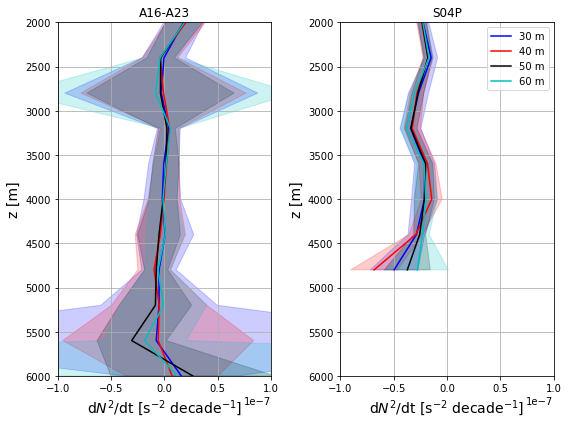

In [67]:
labels = ['30 m', '40 m', '50 m', '60 m']
colors = ['b', 'r', 'k', 'c']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6), sharey=False, sharex=False)
count = 0
for filename in ['a16-a23_lr30', 'a16-a23', 'a16-a23_lr50', 'a16-a23_lr60']:
    Data_trend = xr.open_dataset(datafilepath + filename + "_trend.nc")
    var = Data_trend.trend_N2_mean.data
    var_err = Data_trend.trend_N2_err.data
    var_eDOF = Data_trend.eDOF.data
    z_N2 = Data_trend.z_N2.data
    N2_trend_z, N2_trend_err_z, N2_trend_CI_z = err_from_mean(var, var_err, var_eDOF)
    ax[0].plot(N2_trend_z, z_N2, color=colors[count])
    ax[0].fill_betweenx(z_N2, 
                 N2_trend_CI_z[:,0],
                 N2_trend_CI_z[:,1],
                 color=colors[count], alpha=.2)  
    count += 1
    
ax[0].set_ylim([param_plot['z1_lw'], param_plot['z1_up']])
ax[0].set_xlim(param_plot['vlim1'])
ax[0].set_title('A16-A23')
ax[0].grid(True)
ax[0].set_ylabel('z [m]', fontsize=14)
ax[0].set_xlabel('d$N^2$/dt [s$^{-2}$ decade$^{-1}$]', fontsize=14)

count = 0
for filename in ['s04p_lr30', 's04p', 's04p_lr50', 's04p_lr60']:
    Data_trend = xr.open_dataset(datafilepath + filename + "_trend.nc")
    var = Data_trend.trend_N2_mean.data
    var_err = Data_trend.trend_N2_err.data
    var_eDOF = Data_trend.eDOF.data
    z_N2 = Data_trend.z_N2.data
    N2_trend_z, N2_trend_err_z, N2_trend_CI_z = err_from_mean(var, var_err, var_eDOF)
    ax[1].plot(N2_trend_z, z_N2, color=colors[count], label=labels[count])
    ax[1].fill_betweenx(z_N2, 
                 N2_trend_CI_z[:,0],
                 N2_trend_CI_z[:,1],
                 color=colors[count], alpha=.2)  
    count += 1
    
ax[1].legend()
ax[1].set_ylim([param_plot['z1_lw'], param_plot['z1_up']])
ax[1].set_xlim(param_plot['vlim1'])
ax[1].set_title('S04P')
ax[1].grid(True)
ax[1].set_ylabel('z [m]', fontsize=14)
ax[1].set_xlabel('d$N^2$/dt [s$^{-2}$ decade$^{-1}$]', fontsize=14)

plt.tight_layout()
plt.savefig(outfilepath + f'N2_sensitivity_to_lr_mean.jpeg', dpi=300)
plt.savefig(outfilepath + f'N2_sensitivity_to_lr_mean.eps')

## Section diff

In [68]:
def loc_dep_sec(acquisition, method, datafilepath):
    """method = 1: lon section
       method = 0, lat section """
    # station_loc[occupation, lon/lat, station]

    acqui_path = datafilepath + acquisition + '/'
    print(10*"-", acquisition, 10*"-")
    for filename_ in os.listdir(acqui_path):
        if (filename_.endswith(".mat")):  # mat data
            data0 = sio.loadmat(acqui_path + filename_,
                                squeeze_me=True, struct_as_record=False)
            span = np.zeros(len(data0['D_reported']),)
            
            if method:
                for i in range(len(span)):
                    if i == 0:
                        loc = data0['D_reported'][i].latlist
                        loc_ = data0['D_reported'][i].lonlist
                        depth = data0['D_reported'][i].deplist
                    else:
                        loc = np.hstack([loc, data0['D_reported'][i].latlist])
                        loc_ = np.hstack([loc_, data0['D_reported'][i].lonlist])
                        depth = np.hstack([depth, data0['D_reported'][i].deplist])
            else:
                for i in range(len(span)):
                    if i == 0:
                        loc = data0['D_reported'][i].lonlist
                        loc_ = data0['D_reported'][i].latlist
                        depth = data0['D_reported'][i].deplist
                    else:
                        loc = np.hstack([loc, data0['D_reported'][i].lonlist])
                        loc_ = np.hstack([loc, data0['D_reported'][i].latlist])
                        depth = np.hstack([depth, data0['D_reported'][i].deplist])
                        
            ind = np.argsort(loc)
            depth = depth[ind]
            loc = loc[ind]
            loc_ = loc_[ind]
    
    
    return loc, depth#, loc_

In [78]:
def plot_N2_trend_z(data_N2_trend, ax, dl, dz, vrange=[-1e-7,1e-7], yrange=[6000, 0]):
    from matplotlib import cm
    import matplotlib as mpl

    norm = mpl.colors.SymLogNorm(linthresh=5e-8, vmax=vrange[-1], vmin=vrange[0], base=10)

    ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]), 
              np.hstack([data_N2_trend.z_N2.data - dz/2, data_N2_trend.z_N2.data[-1] + dz/2]), 
              data_N2_trend.trend_N2_mean.T, vmax=vrange[-1], vmin=vrange[0], cmap=cm.PiYG_r, norm=norm)
    # data_N2_trend.trend_N2_CI[:,:,1].plot.contour(ax=ax, y='z_N2', levels=[0], colors='grey')
    
    for j in range(len(data_N2_trend.LL_st)):
        for k in range(len(data_N2_trend.z_N2)):
            if data_N2_trend.trend_N2_CI[j,k,1] < 0:
#                 ax.plot(data_N2_trend.LL_st[j], data_N2_trend.z_N2[k], 'kp')
                ax.plot([data_N2_trend.LL_st[j], data_N2_trend.LL_st[j]+dl/2], [data_N2_trend.z_N2[k]-dz/4, data_N2_trend.z_N2[k]+dz/2], 'k-', lw=.5)
                ax.plot([data_N2_trend.LL_st[j]+dl/2, data_N2_trend.LL_st[j]+dl], [data_N2_trend.z_N2[k]-dz/2, data_N2_trend.z_N2[k]+dz/4], 'k-', lw=.5)
            if data_N2_trend.trend_N2_CI[j,k,0] > 0:
                ax.plot([data_N2_trend.LL_st[j]+dl/2, data_N2_trend.LL_st[j]], [data_N2_trend.z_N2[k]-dz/2, data_N2_trend.z_N2[k]+dz/4], 'k-', lw=.5)
                ax.plot([data_N2_trend.LL_st[j]+dl, data_N2_trend.LL_st[j]+dl/2], [data_N2_trend.z_N2[k]-dz/4, data_N2_trend.z_N2[k]+dz/2], 'k-', lw=.5)
    ax.set_ylim(yrange)
    
    
    
def plot_N2_trend_sig(data_N2_trend, ax, dl, dsig, vrange=[-1e-7,1e-7], yrange=[46.13, 46.01]):
    from matplotlib import cm
    import matplotlib as mpl

    norm = mpl.colors.SymLogNorm(linthresh=5e-8, vmax=vrange[-1], vmin=vrange[0], base=10)

    ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]), 
              np.hstack([data_N2_trend.z_N2.data - dsig/2, data_N2_trend.z_N2.data[-1] + dsig/2]), 
              data_N2_trend.trend_N2_mean.T, vmax=vrange[-1], vmin=vrange[0], cmap=cm.PiYG_r, norm=norm)
    # data_N2_trend.trend_N2_CI[:,:,1].plot.contour(ax=ax, y='z_N2', levels=[0], colors='grey')
    
    for j in range(len(data_N2_trend.LL_st)):
        for k in range(len(data_N2_trend.z_N2)):
            if data_N2_trend.trend_N2_CI[j,k,1] < 0:
                ax.plot([data_N2_trend.LL_st[j], data_N2_trend.LL_st[j]+dl/2], [data_N2_trend.z_N2[k]-dsig/4, data_N2_trend.z_N2[k]+dsig/2], 'k-', lw=.5)
                ax.plot([data_N2_trend.LL_st[j]+dl/2, data_N2_trend.LL_st[j]+dl], [data_N2_trend.z_N2[k]-dsig/2, data_N2_trend.z_N2[k]+dsig/4], 'k-', lw=.5)
            if data_N2_trend.trend_N2_CI[j,k,0] > 0:
                ax.plot([data_N2_trend.LL_st[j]+dl/2, data_N2_trend.LL_st[j]], [data_N2_trend.z_N2[k]-dsig/2, data_N2_trend.z_N2[k]+dsig/4], 'k-', lw=.5)
                ax.plot([data_N2_trend.LL_st[j]+dl, data_N2_trend.LL_st[j]+dl/2], [data_N2_trend.z_N2[k]-dsig/4, data_N2_trend.z_N2[k]+dsig/2], 'k-', lw=.5)
    ax.set_ylim(yrange)


In [76]:
# load bathymetry and create a DataArray object
Topo = topo.read_topo('../data/', 'ETOPO1_Bed_g_geotiff.tif', 0)

vrange=[-1e-7,1e-7]
yrange=[6000, 2000]

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4085420982.py:15: RuntimeWarning: Mean of empty slice
  cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4085420982.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',line

---------- A16-A23 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4085420982.py:15: RuntimeWarning: Mean of empty slice
  cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4085420982.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',line

---------- A16-A23 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4085420982.py:15: RuntimeWarning: Mean of empty slice
  cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4085420982.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',line

---------- A16-A23 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4085420982.py:15: RuntimeWarning: Mean of empty slice
  cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_50316/4085420982.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',line

---------- A16-A23 ----------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

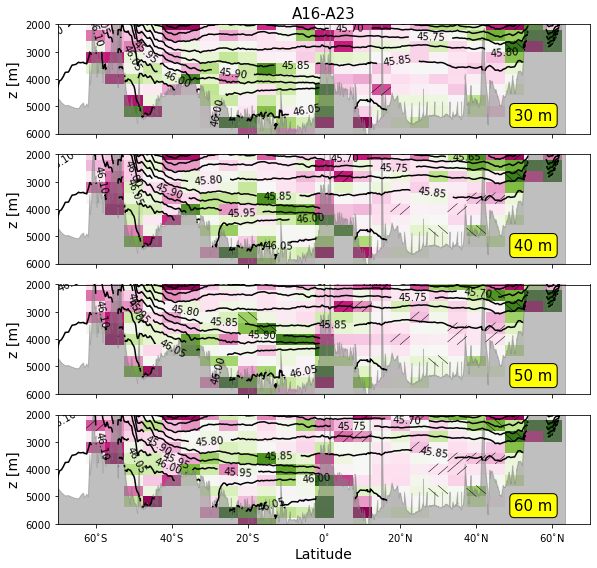

In [83]:
from matplotlib import cm
import matplotlib as mpl

norm = mpl.colors.SymLogNorm(linthresh=5e-8, vmax=vrange[-1], vmin=vrange[0], base=10)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(140/100*6, 2*4), sharex=True)

count = 0
Data_trend_base = xr.open_dataset(datafilepath + 'a16-a23' + "_trend.nc")
var_base = Data_trend_base.trend_N2_mean.data
for filename in ['a16-a23_lr30', 'a16-a23', 'a16-a23_lr50', 'a16-a23_lr60']:
    Data = xr.open_dataset(datafilepath + filename + ".nc")
    Data_trend = xr.open_dataset(datafilepath + filename + "_trend.nc")
    plot_N2_trend_z(Data_trend, ax[count], np.diff(Data_trend.LL_st)[0], np.diff(Data_trend.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['z1_lw'], param_plot['z1_up']])
    cs = ax[count].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
    ax[count].clabel(cs, cs.levels, fmt ='%1.2f',  inline=True, fontsize=10)        
    ax[count].set_ylabel('z [m]', fontsize=14)
    ax[count].set_xlim([-70, 70])
    ax[count].set_xticks(np.arange(-60, 60+1, 20))
    if count == 3:
        ax[count].set_xticklabels(['60$^{\circ}$S','40$^{\circ}$S','20$^{\circ}$S','0$^{\circ}$',
                            '20$^{\circ}$N','40$^{\circ}$N','60$^{\circ}$N'])
        ax[count].set_xlabel('Latitude', fontsize=14)
    loc_ll, dep_ll = loc_dep_sec('A16-A23', 1, datafilepath_sec+'atlantic/')
    ax[count].fill_between(loc_ll, dep_ll, 6000, color='.5', alpha=.5)
    ax[count].text(50, 5500, labels[count], fontsize=15, bbox=dict(boxstyle='round', facecolor='yellow'))
    
    count += 1
    
ax[0].set_title('A16-A23', fontsize=15)
plt.tight_layout()
plt.savefig(outfilepath+ 'N2_sensitivity_to_lr_section.jpeg', dpi=300)
plt.savefig(outfilepath+ 'N2_sensitivity_to_lr_section.eps')    

## Scaling factor

In [188]:
filename = 'p06'
Data = xr.open_dataset(datafilepath + filename + ".nc")

Text(0, 0.5, '$log_{10}(N^2)$')

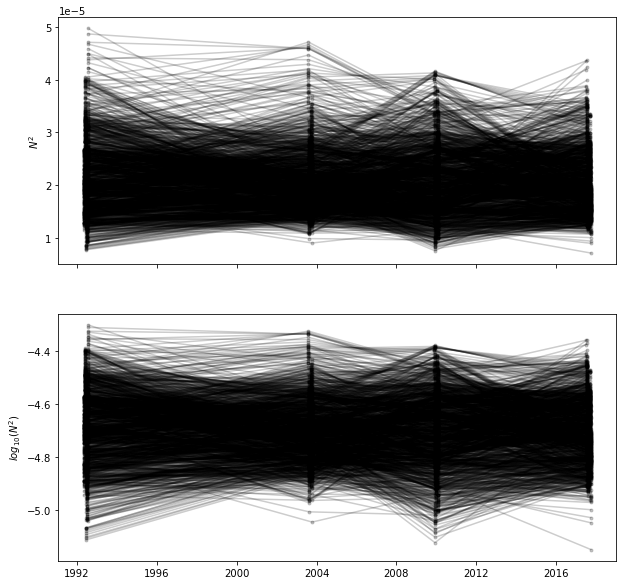

In [189]:
idx = np.where(z_N2 == 4000)[0][0]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)
for i in range(len(Data.LL)):
    ax[0].plot(Data.time[:,i], Data.N2[:,i,idx], 'k.-', alpha=.2)
    ax[1].plot(Data.time[:,i], np.log10(Data.N2[:,i,idx]), 'k.-', alpha=.2)
ax[0].set_ylabel('$N^2$')
ax[1].set_ylabel('$log_{10}(N^2)$')

In [202]:
from scipy import stats
nyr = 10

time = Data.time.data
tim_sec = np.zeros(time.shape) + np.nan
for i in range(len(Data.LL)):
    if len(time[~np.isnan(time[:,i]),i])>0:
        tim_sec[:,i] = (time[:,i] - time[~np.isnan(time[:,i]),i][0]).astype('timedelta64[s]').astype('float')
    else:
        tim_sec[:,i] = (time[:,i] - time[:,0]).astype('timedelta64[s]').astype('float')
x = tim_sec.flatten()

print(10*'-'+'No log'+10*'-')
y = Data.N2[:,:,idx].data.flatten()
bad_indexes = np.isnan(y)
good_indexes = np.logical_not(bad_indexes)
if len(y[good_indexes])>1:
    res = stats.linregress(x[good_indexes], y[good_indexes])
    trend_nyr = res.slope*utils.sec_in_yr()*nyr 
else:
    trend_nyr = np.nan
print(f"Trend_nyr: {trend_nyr}")
print(f"change Trend_nyr: {trend_nyr/np.nanmean(Data.N2[:,:,idx][0,:])}")
print(f"Stderr: {res.stderr*utils.sec_in_yr()*nyr }")
print(f"R-squared: {res.rvalue**2:.6f}")

print(10*'-'+'log10'+10*'-')
y = np.log10(Data.N2[:,:,idx].data.flatten())
bad_indexes = np.isnan(y)
good_indexes = np.logical_not(bad_indexes)
if len(y[good_indexes])>1:
    res = stats.linregress(x[good_indexes], y[good_indexes])
    trend_nyr = res.slope*utils.sec_in_yr()*nyr 
else:
    trend_nyr = np.nan
print(f"change Trend_nyr: {10**(trend_nyr)-1}")

print(10*'-'+'ln'+10*'-')
y = np.log(Data.N2[:,:,idx].data.flatten())
bad_indexes = np.isnan(y)
good_indexes = np.logical_not(bad_indexes)
if len(y[good_indexes])>1:
    res = stats.linregress(x[good_indexes], y[good_indexes])
    trend_nyr = res.slope*utils.sec_in_yr()*nyr 
else:
    trend_nyr = np.nan
print(f"change Trend_nyr: {trend_nyr}")


----------No log----------
Trend_nyr: -2.9094705155308577e-07
change Trend_nyr: -0.013442179225165843
Stderr: 9.70536601813408e-08
R-squared: 0.001665
----------log10----------
change Trend_nyr: -0.009351215187611617
----------ln----------
change Trend_nyr: -0.009395212299474681
